In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## Data 
URL(Desktop/github/datasets/PRSA_data_2010.1.1-2014.12.31.csv)

No：行番号<br>
year：この行のデータの年<br>
month：この行のデータの月<br>
day：この行のデータの日<br>
hour：この行のデータの時間<br>
pm2.5：PM2.5濃度（ug / m ^ 3）<br>
DEWP：露点（â„ƒ）<br>
TEMP：温度（â„ƒ）<br>
PRES：圧力（hPa）<br>
cbwd：結合された風向<br>
Iws：累積風速（m / s）<br>
Is：積雪時間<br>
Ir：雨の累積時間<br>

In [2]:
df = pd.read_csv('../datasets/PRSA_data_2010.1.1-2014.12.31.csv', sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
df.shape

(43824, 13)

In [4]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [5]:
df.isnull().any(axis=1)
df.isnull().any(axis=0)

No       False
year     False
month    False
day      False
hour     False
pm2.5     True
DEWP     False
TEMP     False
PRES     False
cbwd     False
Iws      False
Is       False
Ir       False
dtype: bool

In [6]:
df.isnull().sum(axis=1)
df.isnull().sum(axis=0)

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [7]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


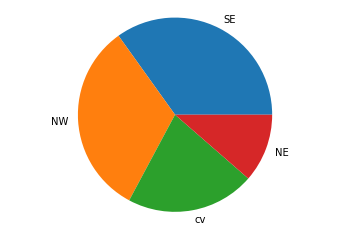

In [8]:
cbwd_label = df['cbwd'].value_counts(ascending=False, normalize=True).index
cbwd_vals = df['cbwd'].value_counts(ascending=False, normalize=True).values

plt.pie(cbwd_vals, labels=cbwd_label) #円グラフ
plt.axis('equal')
plt.show()

SE(南東)→0<br>
NE(北東)→1<br>
NW(北西)→2<br>
cv(?)→3<br>

In [9]:
df = df.replace('SE', 0)
df = df.replace('NE', 1)
df = df.replace('NW', 2)
df = df.replace('cv', 3)
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,2,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,2,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,2,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,2,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,2,12.97,0,0


In [10]:
c = collections.Counter(df['pm2.5'] == 0)

print(c)

Counter({False: 43822, True: 2})


## pm2.5の欠損値を０に補完

In [11]:
df = df.fillna({'pm2.5':0})
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,0.0,-21,-11.0,1021.0,2,1.79,0,0
1,2,2010,1,1,1,0.0,-21,-12.0,1020.0,2,4.92,0,0
2,3,2010,1,1,2,0.0,-21,-11.0,1019.0,2,6.71,0,0
3,4,2010,1,1,3,0.0,-21,-14.0,1019.0,2,9.84,0,0
4,5,2010,1,1,4,0.0,-20,-12.0,1018.0,2,12.97,0,0


In [12]:
tmp1 = df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']]
tmp1 = pd.DataFrame(tmp1)
tmp1.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,0.0,-21,-11.0,1021.0,2,1.79,0,0
1,0.0,-21,-12.0,1020.0,2,4.92,0,0
2,0.0,-21,-11.0,1019.0,2,6.71,0,0
3,0.0,-21,-14.0,1019.0,2,9.84,0,0
4,0.0,-20,-12.0,1018.0,2,12.97,0,0


## Z変換

In [13]:
sc = StandardScaler()
sc.fit(tmp1)

tmp1_sc = pd.DataFrame(sc.transform(tmp1), columns=tmp1.columns)
tmp1_sc.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,-1.018534,-1.580878,-1.922250,0.443328,0.511203,-0.441894,-0.069353,-0.137667
1,-1.018534,-1.580878,-2.004228,0.345943,0.511203,-0.379306,-0.069353,-0.137667
2,-1.018534,-1.580878,-1.922250,0.248559,0.511203,-0.343514,-0.069353,-0.137667
3,-1.018534,-1.580878,-2.168183,0.248559,0.511203,-0.280926,-0.069353,-0.137667
4,-1.018534,-1.511594,-2.004228,0.151174,0.511203,-0.218339,-0.069353,-0.137667


In [14]:
tmp2 = df[['year', 'month', 'day', 'hour']]
tmp2 = pd.DataFrame(tmp2)
tmp2.head()

,year,month,day,hour
0,2010,1,1,0
1,2010,1,1,1
2,2010,1,1,2
3,2010,1,1,3
4,2010,1,1,4


In [15]:
tmp3 = (tmp2['year'].astype(str)).str.cat(tmp2['month'].astype(str), sep='-').str.cat(tmp2['day'].astype(str), sep='-').str.cat(tmp2['hour'].astype(str), sep='-')
tmp3.head()

0    2010-1-1-0
1    2010-1-1-1
2    2010-1-1-2
3    2010-1-1-3
4    2010-1-1-4
Name: year, dtype: object

In [16]:
df_new = pd.concat([tmp1, tmp3], axis=1)

df_new.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,year
0,0.0,-21,-11.0,1021.0,2,1.79,0,0,2010-1-1-0
1,0.0,-21,-12.0,1020.0,2,4.92,0,0,2010-1-1-1
2,0.0,-21,-11.0,1019.0,2,6.71,0,0,2010-1-1-2
3,0.0,-21,-14.0,1019.0,2,9.84,0,0,2010-1-1-3
4,0.0,-20,-12.0,1018.0,2,12.97,0,0,2010-1-1-4


In [20]:
# DataFrame→array変換
df_array = np.array(df_new)
# 時系列データを入れる箱
sequences = []
# 正解データを入れる箱
target = []
# 正解データの日付を入れる箱
target_date = []

df_array

array([[0.0, -21, -11.0, ..., 0, 0, '2010-1-1-0'],
       [0.0, -21, -12.0, ..., 0, 0, '2010-1-1-1'],
       [0.0, -21, -11.0, ..., 0, 0, '2010-1-1-2'],
       ...,
       [10.0, -22, -3.0, ..., 0, 0, '2014-12-31-21'],
       [8.0, -22, -4.0, ..., 0, 0, '2014-12-31-22'],
       [12.0, -21, -3.0, ..., 0, 0, '2014-12-31-23']], dtype=object)

In [21]:
# 一つの時系列データの長さ
#2010-1-1-0 ~ 2010-1-1-23 の正解データは2010-1-2-0
length_per_unit = 24

# 一グループごとに時系列データと正解データをセットしていく
for i in range(0, df_array.shape[0] - length_per_unit):
    sequences.append(df_array[i:i + length_per_unit])
    target.append(df_array[i + length_per_unit])
    target_date.append(df[i + length_per_unit: i + length_per_unit + 1].index.strftime('%Y/%m/%d'))

AttributeError: 'RangeIndex' object has no attribute 'strftime'

In [ ]:
dimension = 

# 時系列データを成形
X = np.array(sequences).reshape(len(sequences), length_per_unit, dimension)
# 正解データを成形
Y = np.array(target).reshape(len(sequences), 1)
# 正解データの日付データを成形
Y_date = np.array(target_date).reshape(len(sequences), 1)